In [1]:
# Needed to see animation if using jupyter notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


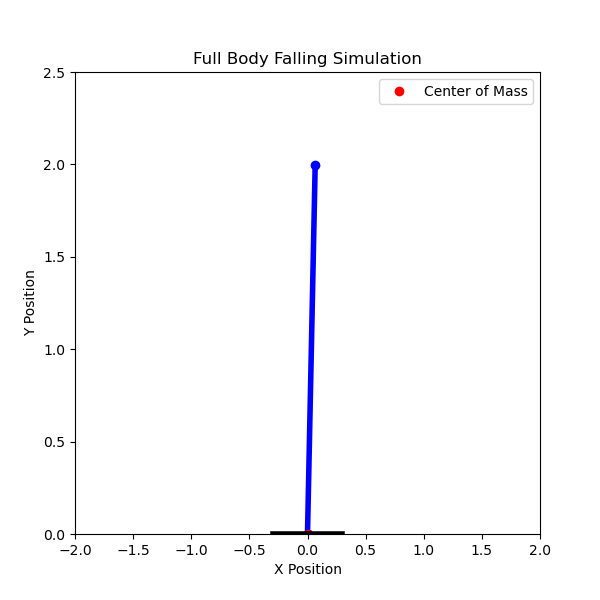

In [2]:
# Falling Body Simulation Visualization

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sys

# Add path
sys.path.append("C:/Users/Admin/Documents/Michigan MSU/Spring 2025/CMSE 802/Project/cmse802_project/src/physics")

from falling_body_simulation import simulate_falling_body

time, torso_x, torso_y, foot_positions, com_positions = simulate_falling_body()

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 2.5)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Full Body Falling Simulation")

torso_line, = ax.plot([], [], 'o-', lw=4, color='blue')
com_marker, = ax.plot([], [], 'ro', markersize=6, label='Center of Mass')
left_leg, = ax.plot([], [], lw=4, color='black')
right_leg, = ax.plot([], [], lw=4, color='black')

ax.legend()

def init():
    torso_line.set_data([], [])
    com_marker.set_data([], [])
    left_leg.set_data([], [])
    right_leg.set_data([], [])
    return torso_line, com_marker, left_leg, right_leg

def update(frame):
    x_com, y_com = com_positions[frame]
    x_torso = torso_x[frame]
    y_torso = torso_y[frame]
    left_foot_x, right_foot_x = foot_positions[frame]
    foot_y = 0

    # Legs (fixed length to COM)
    left_leg.set_data([left_foot_x, x_com], [foot_y, y_com])
    right_leg.set_data([right_foot_x, x_com], [foot_y, y_com])

    torso_line.set_data([x_com, x_torso], [y_com, y_torso])
    com_marker.set_data(x_com, y_com)

    return torso_line, com_marker, left_leg, right_leg

ani = animation.FuncAnimation(fig, update, frames=len(time), init_func=init,
                              blit=True, interval=20)

plt.show()
